In [10]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

# Read in the data

df = pd.read_csv(r'/Users/puddl/Desktop/Portfolio_Project/movies.csv')


In [11]:
# Look at the data

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [16]:
# Determine if there is missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {:.2f}%'.format(col, pct_missing * 100))

name - 0.00%
rating - 1.00%
genre - 0.00%
year - 0.00%
released - 0.03%
score - 0.04%
votes - 0.04%
director - 0.00%
writer - 0.04%
star - 0.01%
country - 0.04%
budget - 28.31%
gross - 2.46%
company - 0.22%
runtime - 0.05%


In [17]:
# Data types for our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [19]:
# Fixing data type to remove unnecessary decimals

df['budget'] = df['budget'].replace([np.inf, -np.inf], np.nan).astype('Int64')
df['gross'] = df['gross'].replace([np.inf, -np.inf], np.nan).astype('Int64')
df['votes'] = df['votes'].replace([np.inf, -np.inf], np.nan).astype('Int64')

In [25]:
# Make a new column to show the correct year extracted from release date
df['yearcorrect'] = df['released'].str.extract(r'(\d{4})', expand=False)

df['yearcorrect'] = pd.to_numeric(df['yearcorrect'], errors='coerce')

In [29]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   
...                                          ...    ...     ...   ...   
7663                                More to Life    NaN   Drama  2020   
7664                                 Dream Round    NaN  Comedy  2020   
7665                               Saving Mbango    NaN   Drama  2020   
7666                                It's Just Us    NaN   Drama  2020   
7667                                   Tee em el    NaN  Horror  2020   

                               released  score    votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000  Anthony Russo   
...                                 ...    ...      ...            ...   
7663   October 23, 2020 (United States)    3.1       18  Joseph Ebanks   
7664   February 7, 2020 (United States)    4.7       36   Dusty Dukatz   
7665          April 27, 2020 (Cameroon)    5.7       29   Nkanya Nkwai   
7666    October 1, 2020 (United States)    NaN     <NA>  James Randall   
7667    August 19, 2020 (United States)    5.7        7   Pereko Mosia   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   
...                  ...                ...            ...        ...   
7663       Joseph Ebanks       Shannon Bond  United States       7000   
7664         Lisa Huston   Michael Saquella  United States       <NA>   
7665        Lynno Lovert       Onyama Laura  United States      58750   
7666       James Randall      Christina Roz  United States      15000   
7667        Pereko Mosia   Siyabonga Mabaso   South Africa       <NA>   

           gross                    company  runtime  yearcorrect  
5445  2847246203      Twentieth Century Fox    162.0         2009  
7445  2797501328             Marvel Studios    181.0         2019  
3045  2201647264      Twentieth Century Fox    194.0         1997  
6663  2069521700                  Lucasfilm    138.0         2015  
7244  2048359754             Marvel Studios    149.0         2018  
...          ...                        ...      ...          ...  
7663        <NA>                        NaN     90.0         2020  
7664        <NA>  Cactus Blue Entertainment     90.0         2020  
7665        <NA>           Embi Productions      NaN         2020  
7666        <NA>                        NaN    120.0         2020  
7667        <NA>                PK 65 Films    102.0         2020  

[7668 rows x 16 columns]

In [31]:
pd.set_option('display.max_rows', None)

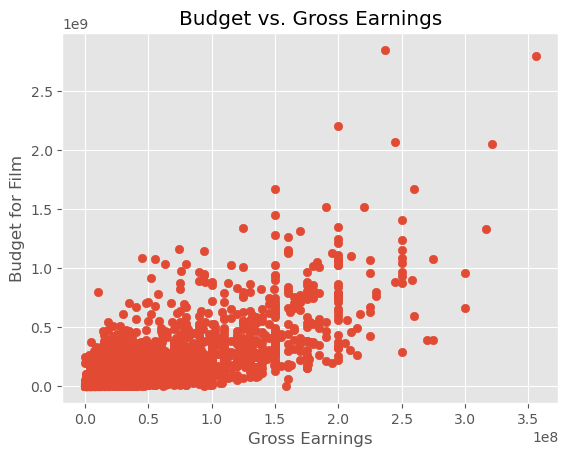

In [34]:
# Scatter plot with budget vs. gross for films that have listed budget and gross revenue

df_cleaned = df.dropna(subset=['budget', 'gross'])

plt.scatter(x=df_cleaned['budget'], y=df_cleaned['gross'])

plt.title('Budget vs. Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

plt.show()


/var/folders/l3/c7dty6cx0yv5s4ldhyjnv1hh0000gn/T/ipykernel_79147/3478151327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['budget'] = df_cleaned['budget'].astype('float64')
/var/folders/l3/c7dty6cx0yv5s4ldhyjnv1hh0000gn/T/ipykernel_79147/3478151327.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['gross'] = df_cleaned['gross'].astype('float64')
/var/folders/l3/c7dty6cx0yv5s4ldhyjnv1hh0000gn/T/ipykernel_79147/3478151327.py:7: SettingWithCopyWarning: 
A value is trying to be set

Number of NaN values in 'budget': 0
Number of NaN values in 'gross': 0


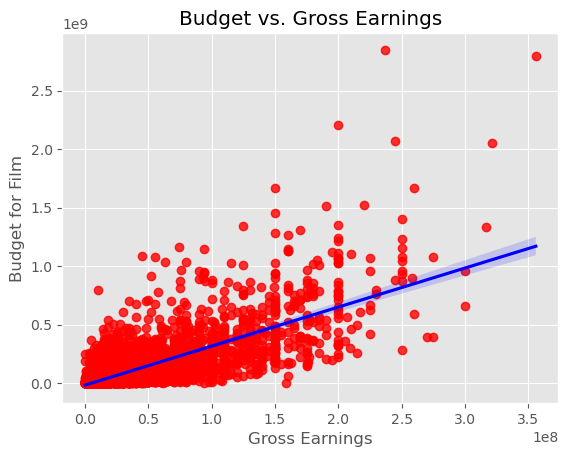

In [46]:
# Plot budget vs. gross using seaborn

df_cleaned['budget'] = df_cleaned['budget'].astype('float64')
df_cleaned['gross'] = df_cleaned['gross'].astype('float64')

df_cleaned.dropna(subset=['budget', 'gross'], inplace=True)

sns.regplot(x='budget', y='gross', data=df_cleaned, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})

plt.title('Budget vs. Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [49]:
# Look at correlation

df.corr(method='pearson')

/var/folders/l3/c7dty6cx0yv5s4ldhyjnv1hh0000gn/T/ipykernel_79147/1164364847.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


year     score     votes    budget     gross   runtime  \
year         1.000000  0.097995  0.222945  0.329321  0.257486  0.120811   
score        0.097995  1.000000  0.409182  0.076254  0.186258  0.399451   
votes        0.222945  0.409182  1.000000  0.442429  0.630757  0.309212   
budget       0.329321  0.076254  0.442429  1.000000  0.740395  0.320447   
gross        0.257486  0.186258  0.630757  0.740395  1.000000  0.245216   
runtime      0.120811  0.399451  0.309212  0.320447  0.245216  1.000000   
yearcorrect  0.997415  0.105994  0.218429  0.321918  0.250514  0.120636   

             yearcorrect  
year            0.997415  
score           0.105994  
votes           0.218429  
budget          0.321918  
gross           0.250514  
runtime         0.120636  
yearcorrect     1.000000

In [50]:
df.corr(method='kendall')

/var/folders/l3/c7dty6cx0yv5s4ldhyjnv1hh0000gn/T/ipykernel_79147/1723791258.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='kendall')


year     score     votes    budget     gross   runtime  \
year         1.000000  0.067652  0.331465  0.224120  0.200618  0.097184   
score        0.067652  1.000000  0.300115 -0.000566  0.086046  0.283611   
votes        0.331465  0.300115  1.000000  0.353702  0.548899  0.198240   
budget       0.224120 -0.000566  0.353702  1.000000  0.512637  0.235483   
gross        0.200618  0.086046  0.548899  0.512637  1.000000  0.168933   
runtime      0.097184  0.283611  0.198240  0.235483  0.168933  1.000000   
yearcorrect  0.987642  0.073436  0.325814  0.216871  0.190789  0.096999   

             yearcorrect  
year            0.987642  
score           0.073436  
votes           0.325814  
budget          0.216871  
gross           0.190789  
runtime         0.096999  
yearcorrect     1.000000

In [51]:
df.corr(method='spearman')

/var/folders/l3/c7dty6cx0yv5s4ldhyjnv1hh0000gn/T/ipykernel_79147/1222267885.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='spearman')


year     score     votes    budget     gross   runtime  \
year         1.000000  0.099045  0.469829  0.317336  0.293084  0.142977   
score        0.099045  1.000000  0.428138 -0.001403  0.126116  0.399857   
votes        0.469829  0.428138  1.000000  0.502466  0.742050  0.290159   
budget       0.317336 -0.001403  0.502466  1.000000  0.693670  0.336370   
gross        0.293084  0.126116  0.742050  0.693670  1.000000  0.246243   
runtime      0.142977  0.399857  0.290159  0.336370  0.246243  1.000000   
yearcorrect  0.997407  0.107602  0.462767  0.306901  0.278701  0.142915   

             yearcorrect  
year            0.997407  
score           0.107602  
votes           0.462767  
budget          0.306901  
gross           0.278701  
runtime         0.142915  
yearcorrect     1.000000

In [ ]:
# There is a high correlation between budget and gross for all types of correlation methods (50%>)

/var/folders/l3/c7dty6cx0yv5s4ldhyjnv1hh0000gn/T/ipykernel_79147/2718275693.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


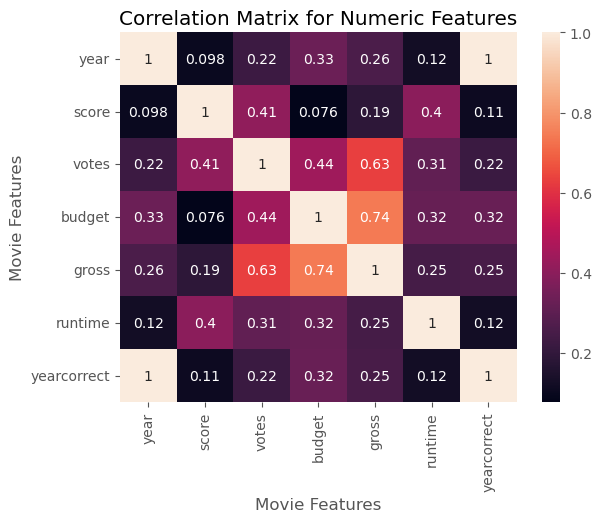

In [53]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [55]:
# Look at Company correlation
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

name  rating  genre  year  released  score    votes  director  writer  \
0     6587       6      6  1980      1705    8.4   927000      2589    4014   
1     5573       6      1  1980      1492    5.8    65000      2269    1632   
2     5142       4      0  1980      1771    8.7  1200000      1111    2567   
3      286       4      4  1980      1492    7.7   221000      1301    2000   
4     1027       6      4  1980      1543    7.3   108000      1054     521   
5     2109       6     10  1980      2502    6.4   123000      2528    4362   
6     5574       6      0  1980      1771    7.9   188000      1412     838   
7     4436       6      3  1980       699    8.2   330000      1829    1769   
8     5281       4      0  1980      1753    6.8   101000      2306    1979   
9     6213       6      3  1980      2286    7.0    10000      2864     423   
10     463       4      0  1980       674    6.1    18000       357    3985   
11    5920       4      1  1980      2987    7.3    54000      1199    1832   
12    4315       4      1  1980       626    5.3    30000      2352    2333   
13    4084       6      6  1980      3211    7.7    49000      2388    2327   
14    1687       6      5  1980      1543    7.1    37000       318     520   
15    5024       4      6  1980      3021    7.2    27000      1243    3548   
16    1900       6      6  1980      2286    6.6    21000        49     735   
17      92       4      4  1980       699    6.9    29000       514    3262   
18    5865       6     10  1980      1108    6.8    66000      1374    2104   
19    5189       6      4  1980       626    6.8    26000      2561     556   
20    1387       6      5  1980       945    6.5    20000      2891    4451   
21    2451       6      1  1980       160    6.8    14000      1892    2926   
22    5845       4      0  1980       281    6.7    22000       744    4192   
23    7445       4      8  1980       585    5.3    12000      2371    3528   
24    7127       4      6  1980      1913    6.4    14000      1153      12   
25     346       6     10  1980       773    6.9    33000      1583    3234   
26    3263       6      4  1980      2059    6.5     5100      2433    2483   
27    4442       4      0  1980       281    5.0     4100      1282      33   
28     980       6      5  1980      1771    7.2    17000      2673    4386   
29     362       6      5  1980       886    6.2    22000      2151    3326   
30    3796       4      4  1980      3296    7.1     8900      2811      83   
31    4373       6     10  1980      1467    5.4    16000      2143    4455   
32    4987       4      0  1980       342    5.3    15000      1041    1587   
33    1103       4      6  1980       160    6.1      604      1644     958   
34    4785       4      4  1980       699    6.7     9100      1225    3136   
35    4362       6      4  1980      2818    6.2    24000      1091    3107   
36    6008       6      4  1980      2452    6.3     4300       855    1358   
37    3721       6      4  1980      2965    6.0    11000      1598    3642   
38    6102       4      6  1980       699    5.9     4000      2296    3826   
39    1244       4      3  1980      2195    7.5    17000      1884    4201   
40    6748       4      7  1980      3101    6.3     5700      1403     518   
41     927       4      6  1980      1588    7.9    13000       335    2252   
42    6644       6      0  1980      1836    7.1     9000      2314    2543   
43    7305       6      3  1980       169    6.6    11000       186    1682   
44    5504       6     10  1980      3042    4.8     2000      1978     151   
45    1152       6      4  1980      1467    6.1    12000      2804    4298   
46    6094       6      0  1980      1705    5.3     3900      1934    3357   
47    5578       6     10  1980      2775    4.6     3900      2836    4344   
48    6360       4      0  1980      2502    5.1     3100       509    2893   
49    3253       4      3  1980      2287    8.3    1500

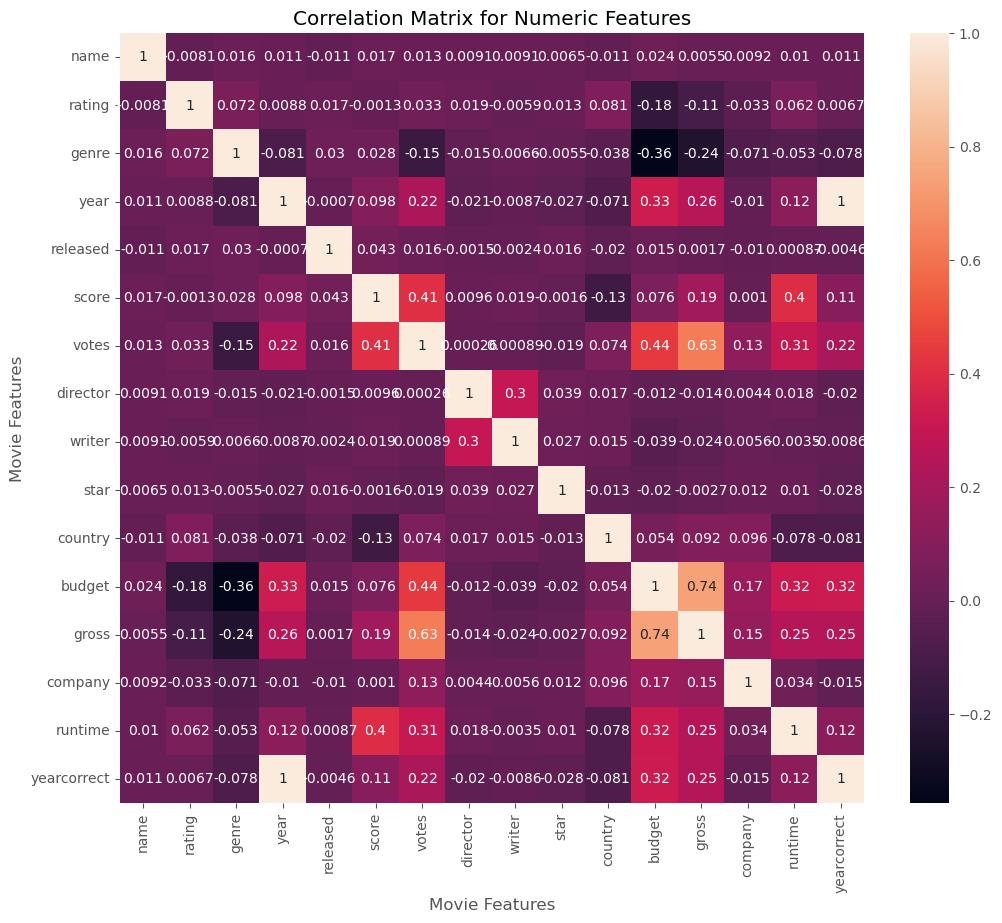

In [57]:
correlation_matrix = df_numerized.corr(method='pearson')

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [58]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name         1.000000 -0.008069  0.016355  0.011453 -0.011311  0.017097   
rating      -0.008069  1.000000  0.072423  0.008779  0.016613 -0.001314   
genre        0.016355  0.072423  1.000000 -0.081261  0.029822  0.027965   
year         0.011453  0.008779 -0.081261  1.000000 -0.000695  0.097995   
released    -0.011311  0.016613  0.029822 -0.000695  1.000000  0.042788   
score        0.017097 -0.001314  0.027965  0.097995  0.042788  1.000000   
votes        0.013088  0.033225 -0.145307  0.222945  0.016097  0.409182   
director     0.009079  0.019483 -0.015258 -0.020795 -0.001478  0.009559   
writer       0.009081 -0.005921  0.006567 -0.008656 -0.002404  0.019416   
star         0.006472  0.013405 -0.005477 -0.027242  0.015777 -0.001609   
country     -0.010737  0.081244 -0.037615 -0.070938 -0.020427 -0.133348   
budget       0.023970 -0.176002 -0.356564  0.329321  0.014683  0.076254   
gross        0.005533 -0.107339 -0.235650  0.257486  0.001659  0.186258   
company      0.009211 -0.032943 -0.071067 -0.010431 -0.010474  0.001030   
runtime      0.010392  0.062145 -0.052711  0.120811  0.000868  0.399451   
yearcorrect  0.010699  0.006741 -0.077911  0.997415 -0.004644  0.105994   

                votes  director    writer      star   country    budget  \
name         0.013088  0.009079  0.009081  0.006472 -0.010737  0.023970   
rating       0.033225  0.019483 -0.005921  0.013405  0.081244 -0.176002   
genre       -0.145307 -0.015258  0.006567 -0.005477 -0.037615 -0.356564   
year         0.222945 -0.020795 -0.008656 -0.027242 -0.070938  0.329321   
released     0.016097 -0.001478 -0.002404  0.015777 -0.020427  0.014683   
score        0.409182  0.009559  0.019416 -0.001609 -0.133348  0.076254   
votes        1.000000  0.000260  0.000892 -0.019282  0.073625  0.442429   
director     0.000260  1.000000  0.299067  0.039234  0.017490 -0.012272   
writer       0.000892  0.299067  1.000000  0.027245  0.015343 -0.039451   
star        -0.019282  0.039234  0.027245  1.000000 -0.012998 -0.019589   
country      0.073625  0.017490  0.015343 -0.012998  1.000000  0.054063   
budget       0.442429 -0.012272 -0.039451 -0.019589  0.054063  1.000000   
gross        0.630757 -0.014441 -0.023519 -0.002717  0.092129  0.740395   
company      0.133204  0.004404  0.005646  0.012442  0.095548  0.173214   
runtime      0.309212  0.017624 -0.003511  0.010174 -0.078412  0.320447   
yearcorrect  0.218429 -0.020422 -0.008611 -0.027611 -0.080844  0.321918   

                gross   company   runtime  yearcorrect  
name         0.005533  0.009211  0.010392     0.010699  
rating      -0.107339 -0.032943  0.062145     0.006741  
genre       -0.235650 -0.071067 -0.052711    -0.077911  
year         0.257486 -0.010431  0.120811     0.997415  
released     0.001659 -0.010474  0.000868    -0.004644  
score        0.186258  0.001030  0.399451     0.105994  
votes        0.630757  0.133204  0.309212     0.218429  
director    -0.014441  0.004404  0.017624    -0.020422  
writer      -0.023519  0.005646 -0.003511    -0.008611  
star        -0.002717  0.012442  0.010174    -0.027611  
country      0.092129  0.095548 -0.078412    -0.080844  
budget       0.740395  0.173214  0.320447     0.321918  
gross        1.000000  0.154840  0.245216     0.250514  
company      0.154840  1.000000  0.034402    -0.015171  
runtime      0.245216  0.034402  1.000000     0.120636  
yearcorrect  0.250514 -0.015171  0.120636     1.000000

In [59]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
             score          0.017097
             votes          0.013088
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.023970
             gross          0.005533
             company        0.009211
             runtime        0.010392
             yearcorrect    0.010699
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score         -0.001314
             votes          0.033225
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
 

In [60]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre        budget        -0.356564
budget       genre         -0.356564
genre        gross         -0.235650
gross        genre         -0.235650
rating       budget        -0.176002
budget       rating        -0.176002
votes        genre         -0.145307
genre        votes         -0.145307
score        country       -0.133348
country      score         -0.133348
gross        rating        -0.107339
rating       gross         -0.107339
year         genre         -0.081261
genre        year          -0.081261
yearcorrect  country       -0.080844
country      yearcorrect   -0.080844
             runtime       -0.078412
runtime      country       -0.078412
genre        yearcorrect   -0.077911
yearcorrect  genre         -0.077911
genre        company       -0.071067
company      genre         -0.071067
year         country       -0.070938
country      year          -0.070938
genre        runtime       -0.052711
runtime      genre         -0.052711
budget       writer        -0.039451
w

In [61]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5 ]

high_corr

votes        gross          0.630757
gross        votes          0.630757
             budget         0.740395
budget       gross          0.740395
year         yearcorrect    0.997415
yearcorrect  year           0.997415
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Votes and Budget have the highest correlation to gross earnings.